## Nama : Jean Paul Denata
## NIM    : 215314107

### 1. Data Preprocessing
Import pandas, numpy, matplotlib dan seaboarn

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabet = pd.read_csv('diabet.csv')
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:
diabet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

### 2. Visualisasi

#### Scatterplot

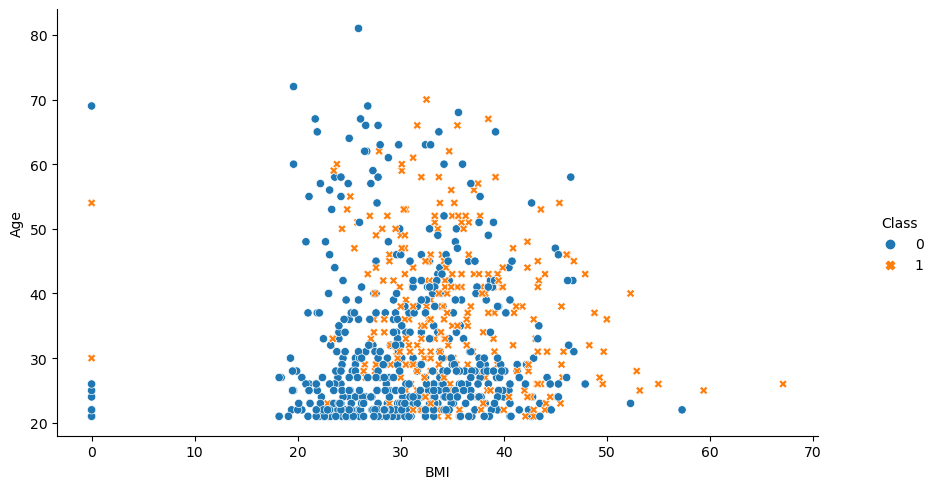

In [129]:
g=sns.relplot(x='BMI',y='Age',data=iris,hue='Class',style='Class')
g.fig.set_size_inches(10,5)
plt.show()

#### Pairplot

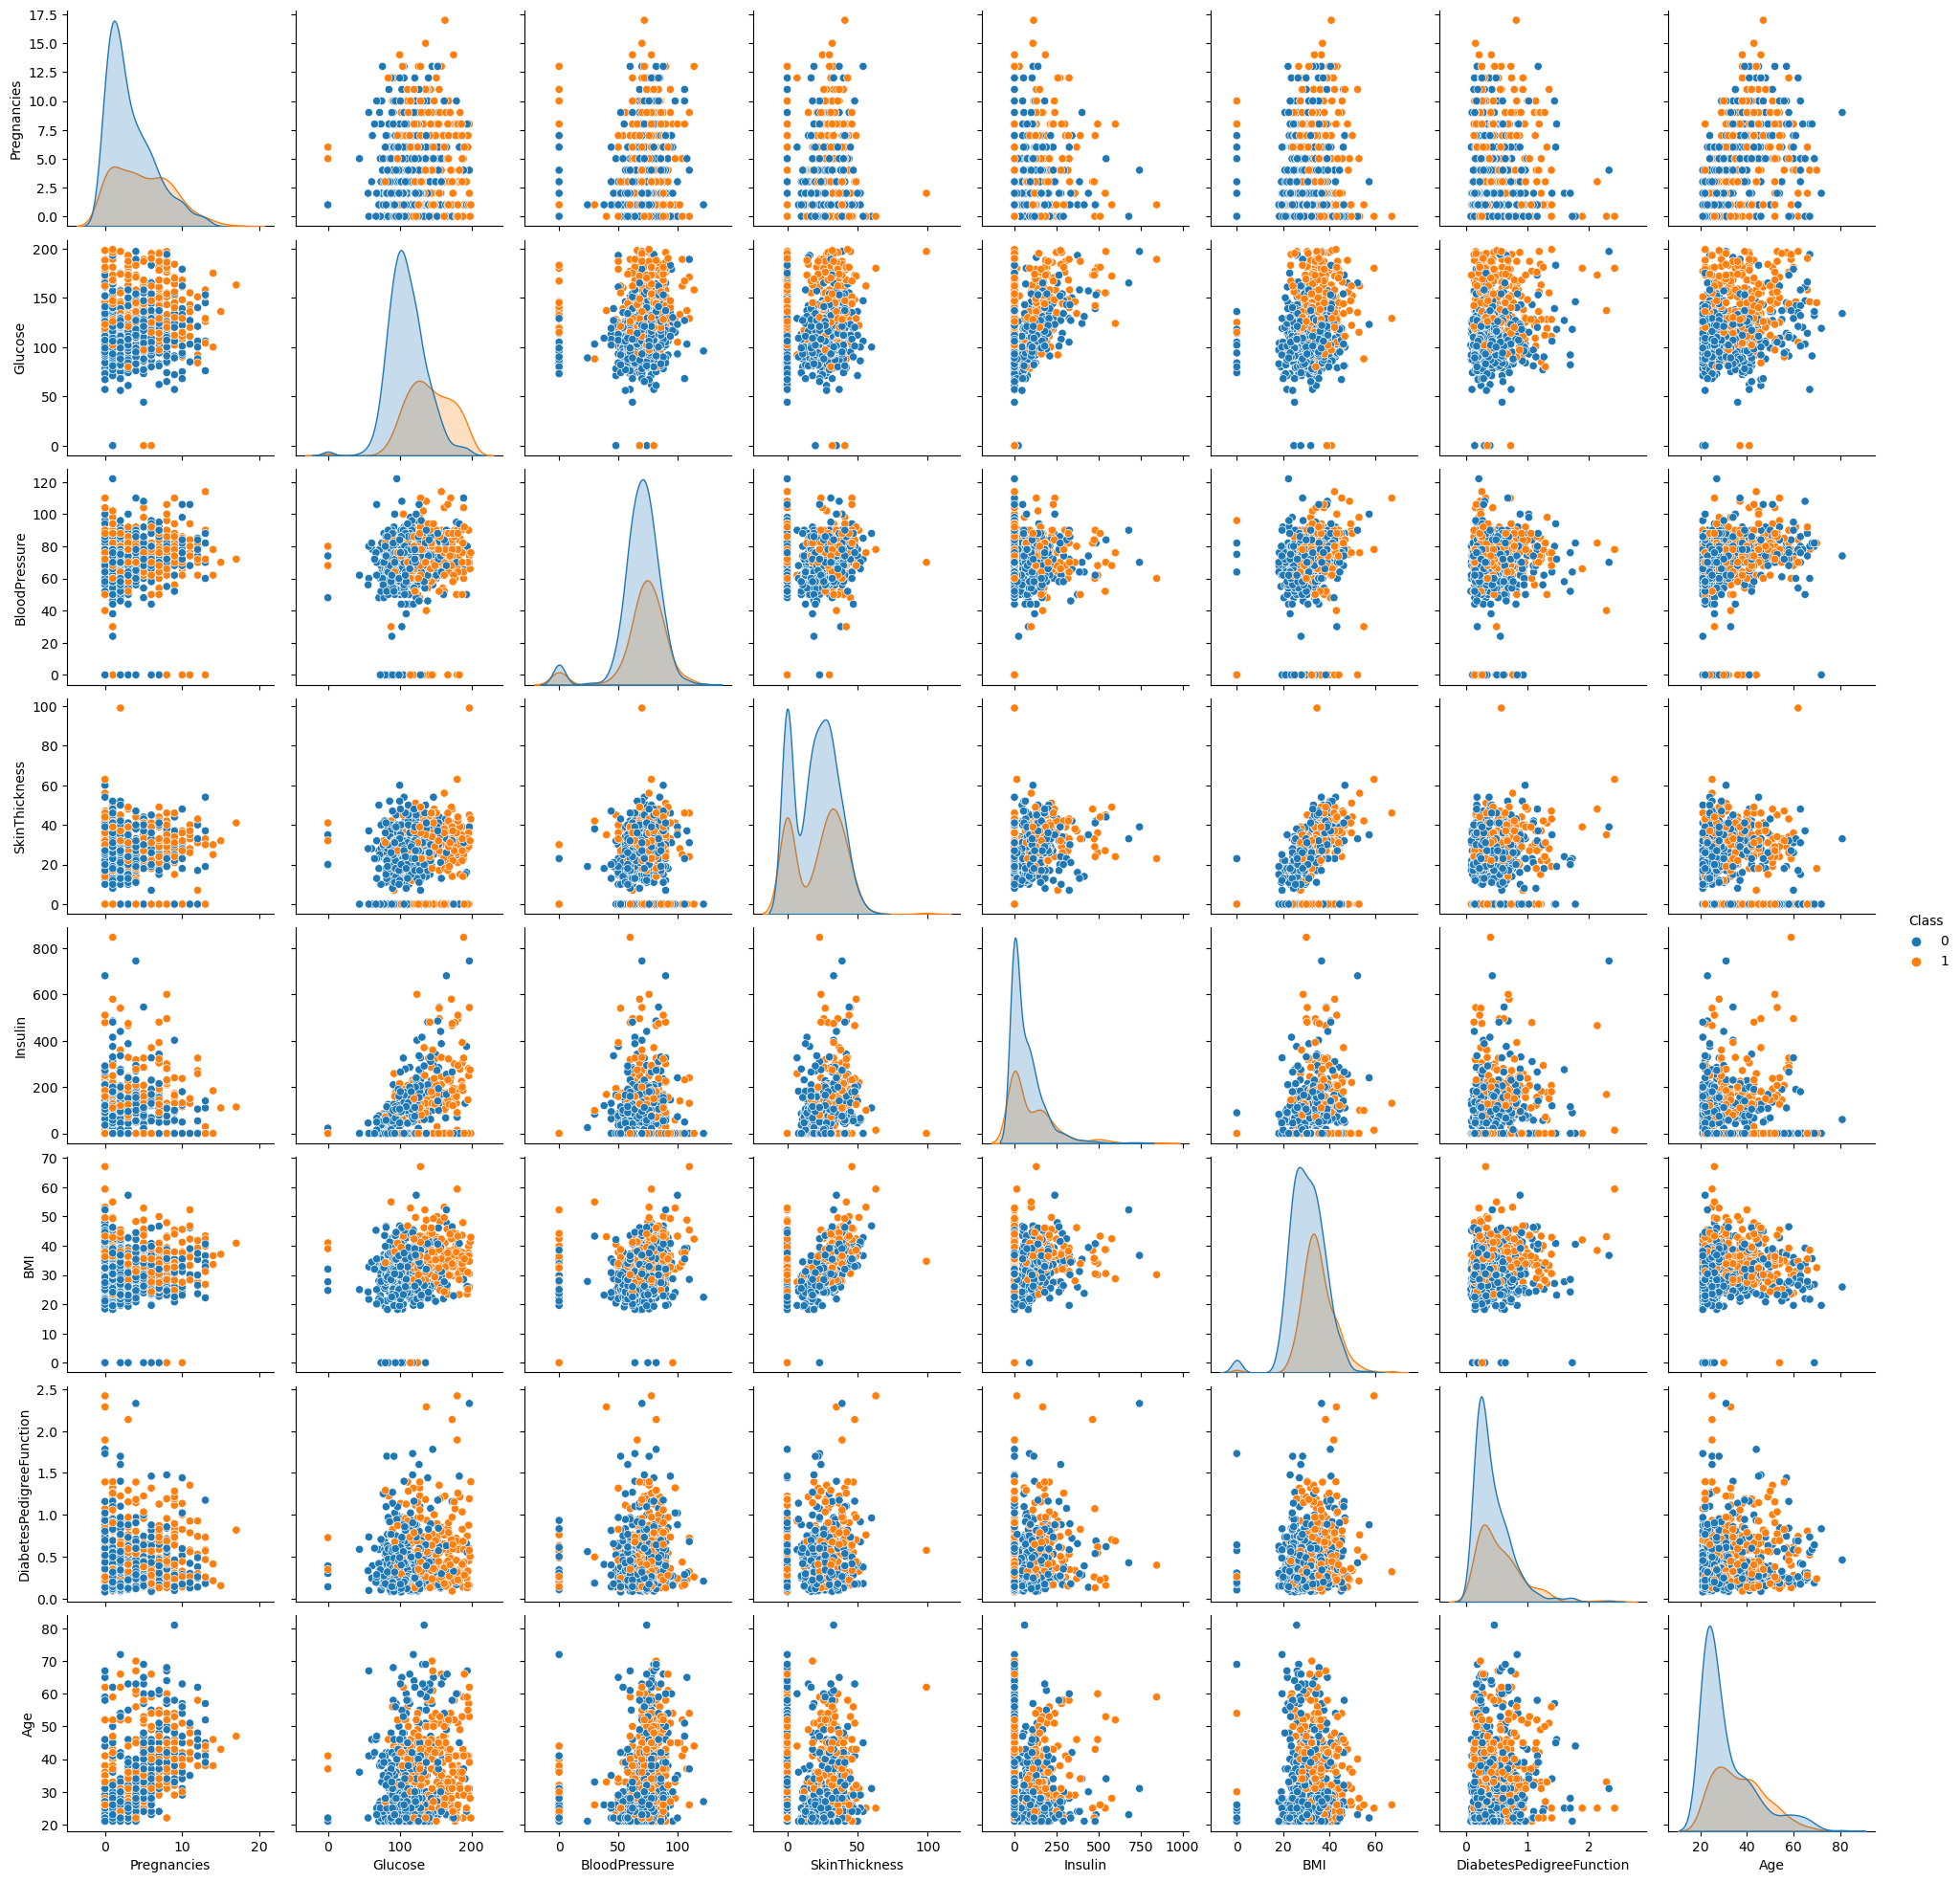

In [130]:
sns.pairplot(diabet,hue="Class")
plt.show()

#### Boxplot

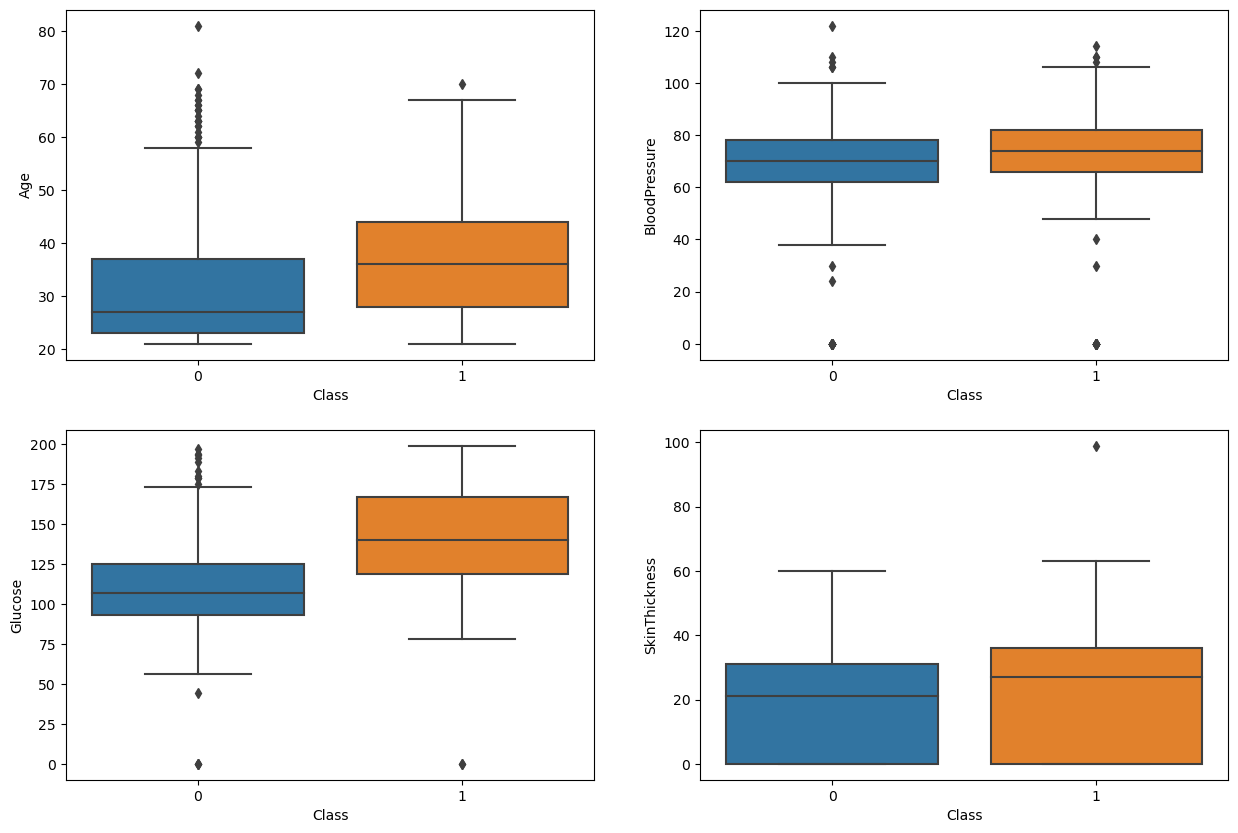

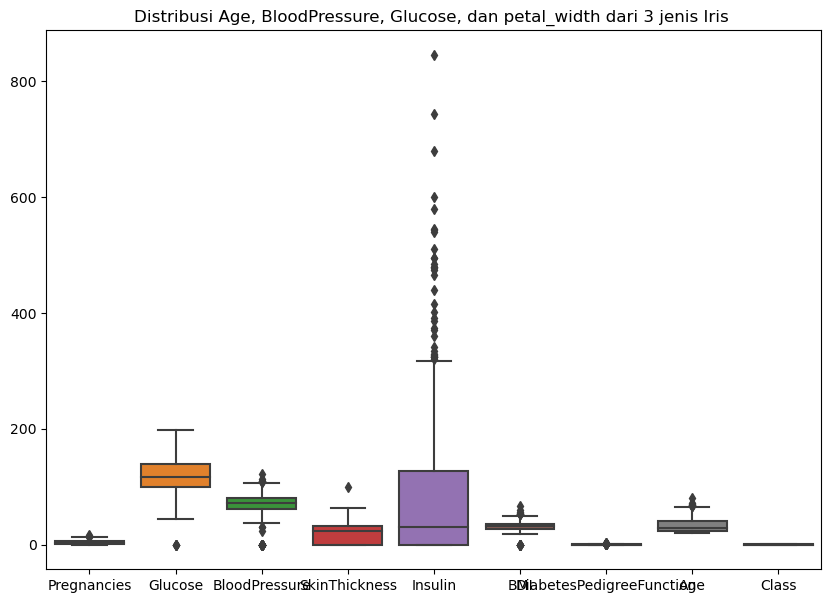

In [131]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Class',y='Age',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Class',y='BloodPressure',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Class',y='Glucose',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Class',y='SkinThickness',data=iris)
plt.show()

plt.subplots(figsize=(10,7))
sns.boxplot(data=iris).set_title("Distribusi Age, BloodPressure, Glucose, dan petal_width dari 3 jenis Iris ")
plt.show()

#### Violin

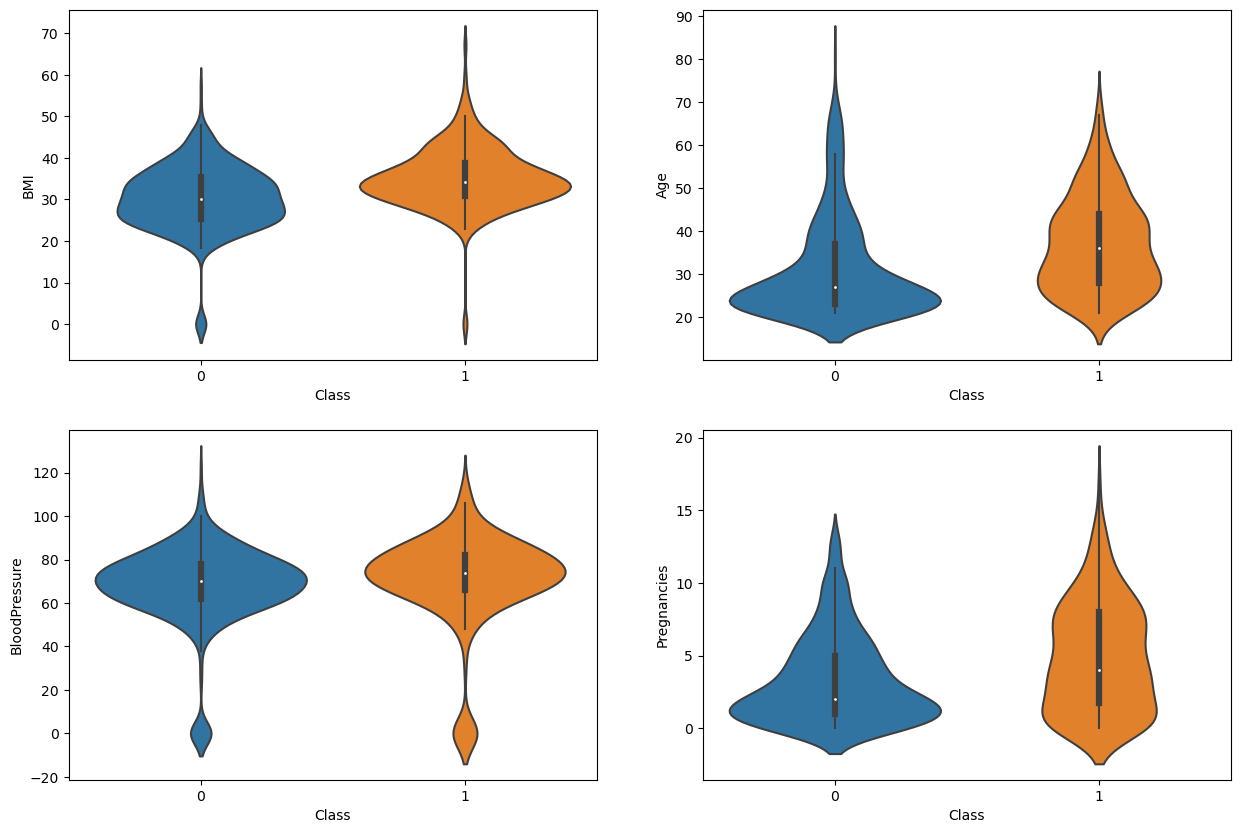

In [132]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Class',y='BMI',data=diabet)
plt.subplot(2,2,2)
sns.violinplot(x='Class',y='Age',data=diabet)
plt.subplot(2,2,3)
sns.violinplot(x='Class',y='BloodPressure',data=diabet)
plt.subplot(2,2,4)
sns.violinplot(x='Class',y='Pregnancies',data=diabet)
plt.show()

#### Areaplot

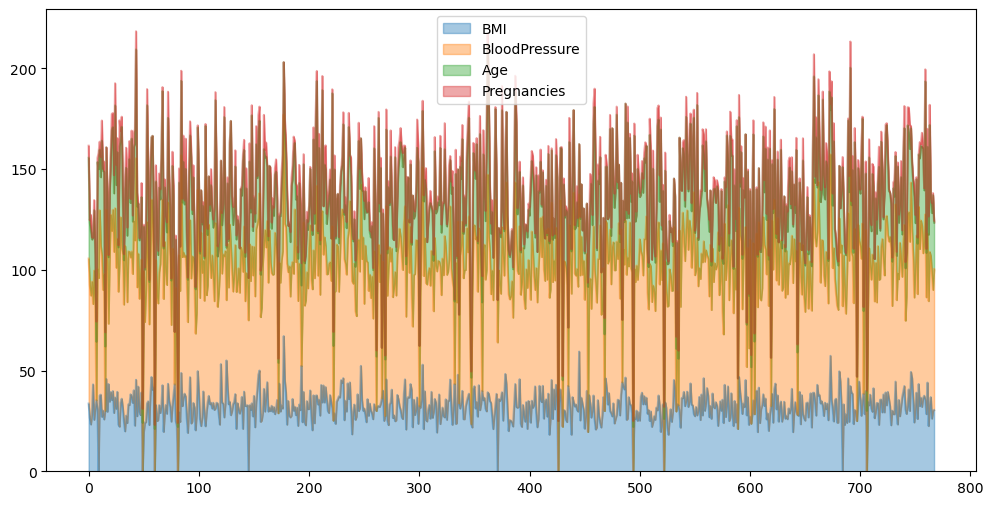

In [133]:
diabet.plot.area(y=['BMI','BloodPressure','Age','Pregnancies'],alpha=0.4,figsize=(12, 6))
plt.show()

#### Correlation

In [134]:
diabet.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


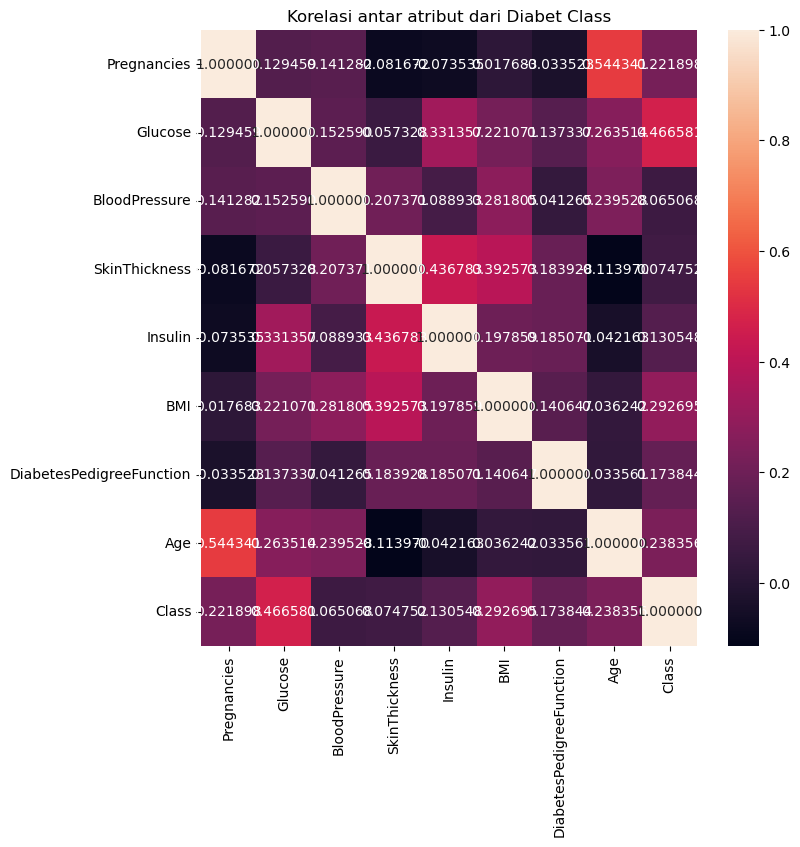

In [135]:
plt.subplots(figsize = (8,8))
sns.heatmap(diabet.corr(),annot=True,fmt="f").set_title("Korelasi antar atribut dari Diabet Class")
plt.show()

### Feature Selection

In [136]:
# Memilih 8 fitur kedalam variabel X
X=diabet.iloc[:,0:8].values

# Memilih kelas label Class ke dalam variabel y
y=diabet.iloc[:,8].values

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Dari 9 atribut dipilih 4
test = SelectKBest(score_func=f_classif,k=4)
fit = test.fit(X, y)
features = fit.transform(X)

# Dari 9 atribut dilihat score tertingginya
score=pd.Series(fit.scores_)
score.index=diabet.columns[0:8]
score.sort_values(ascending=False)


Glucose                     213.161752
BMI                          71.772072
Age                          46.140611
Pregnancies                  39.670227
DiabetesPedigreeFunction     23.871300
Insulin                      13.281108
SkinThickness                 4.304381
BloodPressure                 3.256950
dtype: float64

In [137]:
# Membuat dataframe baru berisi 4 fitur terbaik dari dataset Diabetes
dataSelection =pd.DataFrame(features,columns=fit.get_feature_names_out(input_features=diabet.columns[0:8]))

In [138]:
# Memilih 8 fitur kedalam variabel X
X=dataSelection.iloc[:,0:4].values

# Memilih kelas label Class ke dalam variabel y
y=diabet.iloc[:,8].values

## 3. Building Machine Learning Models

In [139]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

#### Splitting The Data into Training And Testing Dataset

In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

### Decision Tree

In [141]:
# Default menggunakan Gini kalau tidak ada parameternya
decision_tree = DecisionTreeClassifier() 

decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 

# Menghitung akurasi
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

# Membuat confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# akurasi dan presisi dari Decision Tree
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')

recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[130  27]
 [ 33  41]]
accuracy_DecisionTree: 0.740
precision_DecisionTree: 0.740
recall_DecisionTree: 0.740
f1-score_DecisionTree : 0.740


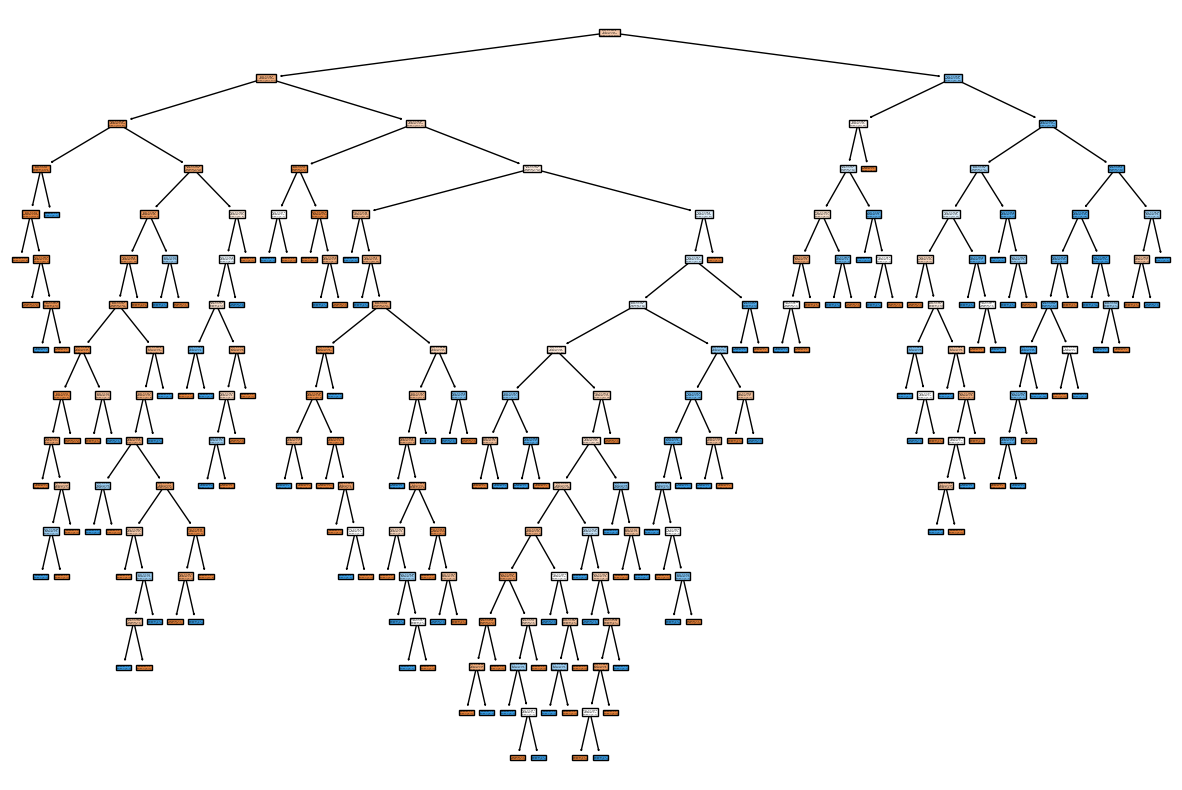

In [142]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

In [143]:
# Menggunakan Entropy
decision_tree = DecisionTreeClassifier(criterion="entropy",max_depth=14) 

# Fit data training ke model
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 

# Membuat confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# akurasi dan presisi dari Decision Tree
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')

recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[121  36]
 [ 31  43]]
accuracy_DecisionTree: 0.710
precision_DecisionTree: 0.710
recall_DecisionTree: 0.710
f1-score_DecisionTree : 0.710


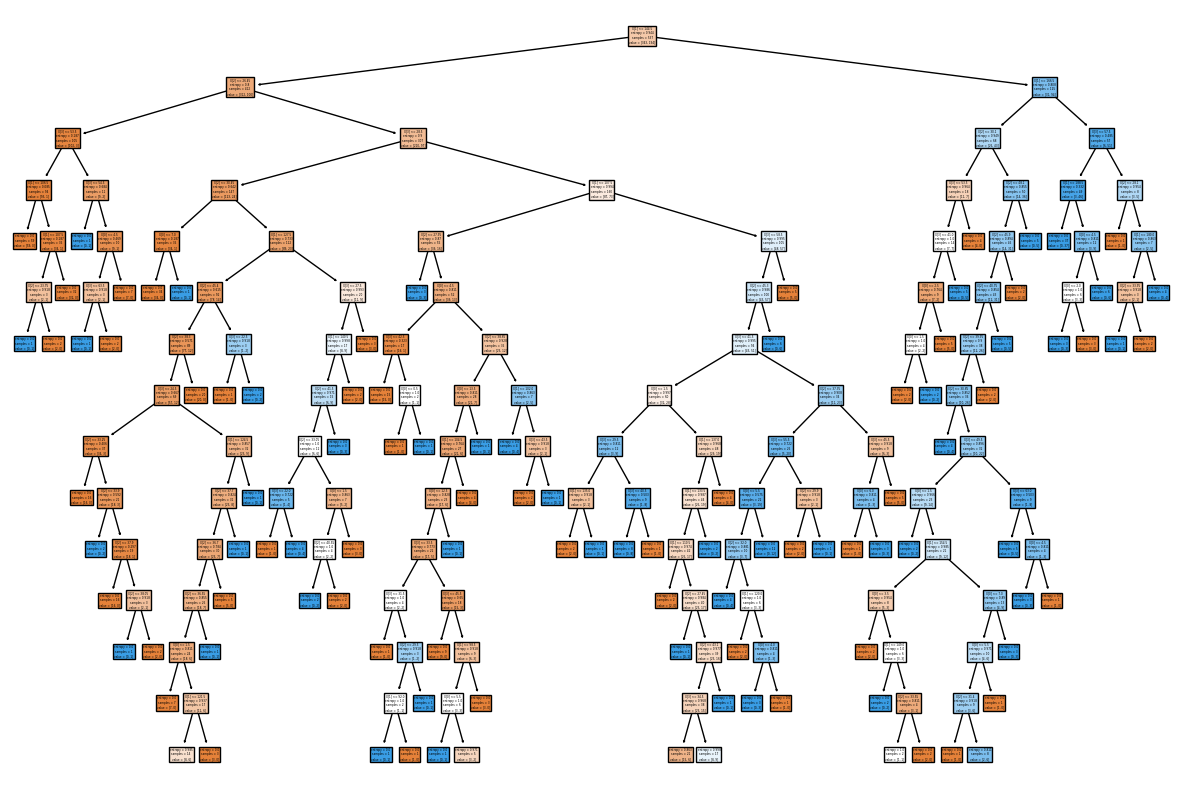

In [144]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

### Random Forest

In [145]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)

# Hitung akurasi dan presisi
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for Random Forest\n',cm)
print('accuracy_rf: %.3f' %accuracy)
print('precision_RandomForest: %.3f' %precision)
print('recall_RandomForest: %.3f' %recall)
print('f1-score_RandomForest : %.3f' %f1)

Confusion matrix for Random Forest
 [[121  36]
 [ 31  43]]
accuracy_rf: 0.710
precision_RandomForest: 0.710
recall_RandomForest: 0.710
f1-score_RandomForest : 0.710


### KNN

In [146]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 

accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)

# Hitung akurasi dan presisi
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN: %.3f' %accuracy)
print('precision_KNN: %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[132  25]
 [ 42  32]]
accuracy_KNN: 0.710
precision_KNN: 0.710
recall_KNN: 0.710
f1-score_KNN : 0.710


E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4260\2552089497.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4260\2552089497.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Serie

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4260\2552089497.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(y_test,prediction)))
E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4260\2552089497.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=

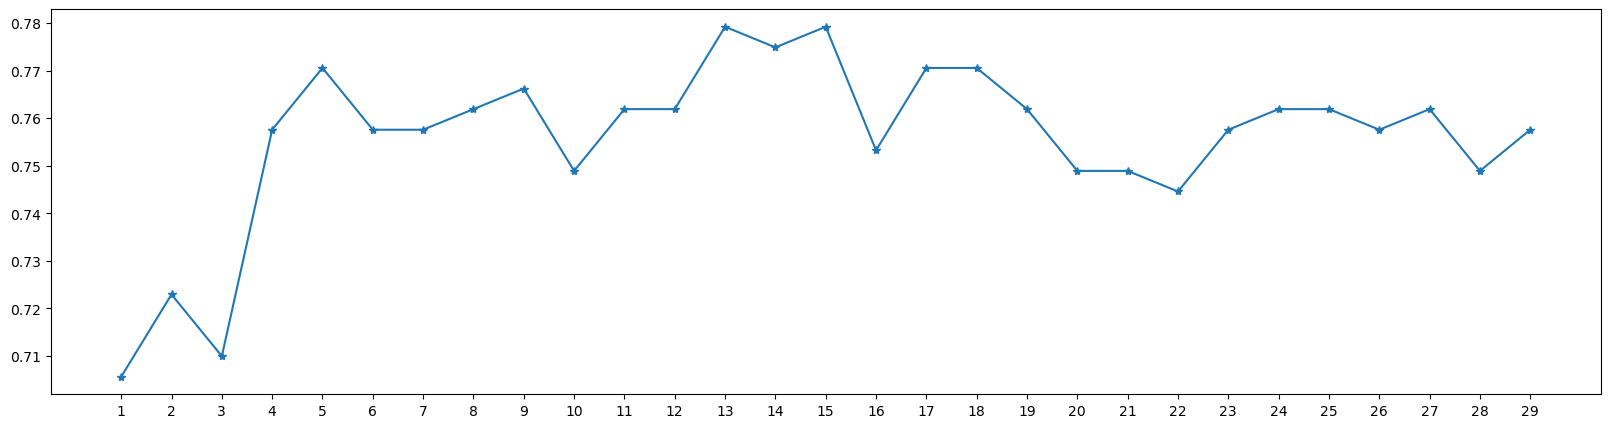

In [147]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,30))
a=pd.Series()
x=range(1,30)

for i in list(range(1,30)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
    
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

### Gaussian Naive Bayes

In [148]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)

# Hitung akurasi dan presisi
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[132  25]
 [ 39  35]]
accuracy_Naive Bayes: 0.723
precision_Naive Bayes: 0.723
recall_Naive Bayes: 0.723
f1-score_Naive Bayes : 0.723


### SVM

In [149]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)

# Hitung akurasi dan presisi
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for SVM\n',cm)
print('accuracy_SVM: %.3f' %accuracy)
print('precision_SVM: %.3f' %precision)
print('recall_SVM: %.3f' %recall)
print('f1-score_SVM : %.3f' %f1)

Confusion matrix for SVM
 [[  7 150]
 [  0  74]]
accuracy_SVM: 0.351
precision_SVM: 0.351
recall_SVM: 0.351
f1-score_SVM : 0.351


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Logistic Regression

In [150]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred,)

# Hitung akurasi dan presisi
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[139  18]
 [ 38  36]]
accuracy_Logistic Regression : 0.758
precision_Logistic Regression : 0.758
recall_Logistic Regression: 0.758
f1-score_Logistic Regression : 0.758


### AdaBoost

In [151]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
accuracy_adaboost=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_adaboost = round(model.score(X_train, y_train) * 100, 2)

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred,)

# Hitung akurasi dan presisi
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for Adaboost\n',cm)
print('accuracy_Ada Boost : %.3f' %accuracy)
print('precision_AdaBoost : %.3f' %precision)
print('recall_AdaBoost: %.3f' %recall)
print('f1-score_AdaBoost : %.3f' %f1)

Confusion matrix for Adaboost
 [[136  21]
 [ 40  34]]
accuracy_Ada Boost : 0.736
precision_AdaBoost : 0.736
recall_AdaBoost: 0.736
f1-score_AdaBoost : 0.736


## Perbandingan Algoritma

In [152]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Logistic Regression', 
              'Random Forest',
              'Naive Bayes',  
              'Support Vector Machine', 
              'Decision Tree',
             'Adaboost'],
    'Score': [ acc_knn,
              acc_log, 
              acc_random_forest,
              acc_gaussian,  
              acc_linear_svc,
              acc_decision_tree,
              acc_adaboost],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_dt,
                      accuracy_adaboost
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Random Forest,100.00,77.06
1,Logistic Regression,77.09,75.76
2,Decision Tree,100.00,74.03
3,Adaboost,80.82,73.59
4,Naive Bayes,77.47,72.29
5,KNN,83.80,71.00
6,Support Vector Machine,40.04,35.06


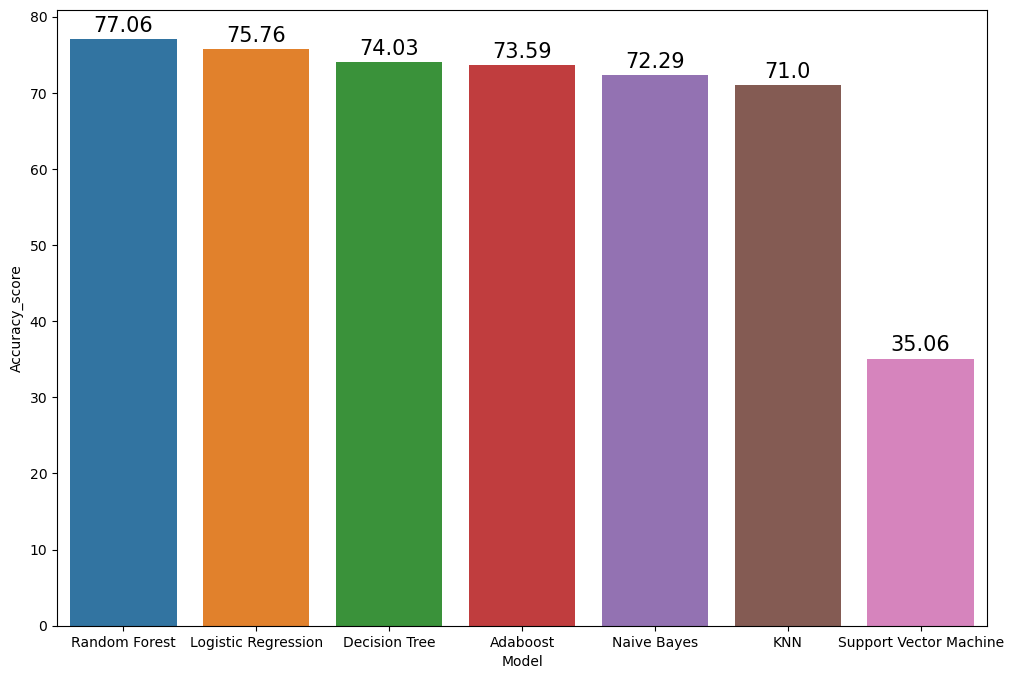

In [153]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])

# Tampilkan jumlah skor di atas bar
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')
plt.show()

Berdasarkan hasil klasifikasi menggunakan 7 metode pada 4 atribut terbaik hasil seleksi fitur, pada kasus dataset Diabet didapat skor tertinggi paling optimal menggunakan algoritma Random Forest, dan skor paling kecil pada algoritma SVM.